In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

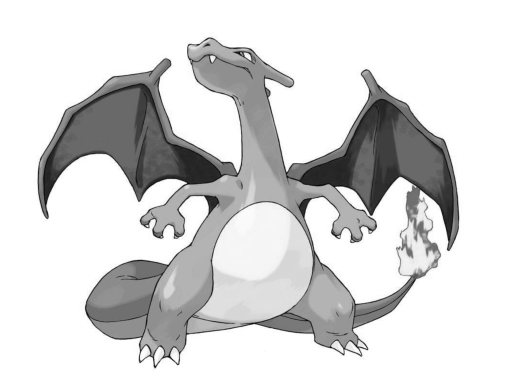

In [16]:
image = cv2.imread('image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [17]:
def apply_mask(image, mask):
    filtered_image = np.zeros_like(image)
    height, width = image.shape
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            region = image[i-1:i+2, j-1:j+2]
            value = np.sum(region * mask)
            filtered_image[i, j] = np.clip(value, 0, 255)
    return filtered_image

In [24]:
prewitt_x = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
prewitt_y = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_filter_combined = prewitt_x + prewitt_y
prewitt_filter_image = apply_mask(image, prewitt_filter_combined)

In [25]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_filter_combined = sobel_x + sobel_y
sobel_filter_image = apply_mask(image, sobel_filter_combined)

In [26]:
laplacian_mask = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
gaussian_mask = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9

In [27]:
gaussian_image = apply_mask(image, gaussian_mask)
LoG_image1 = apply_mask(gaussian_image, laplacian_mask)

In [28]:
canny_image = cv2.Canny(image, 100, 200)

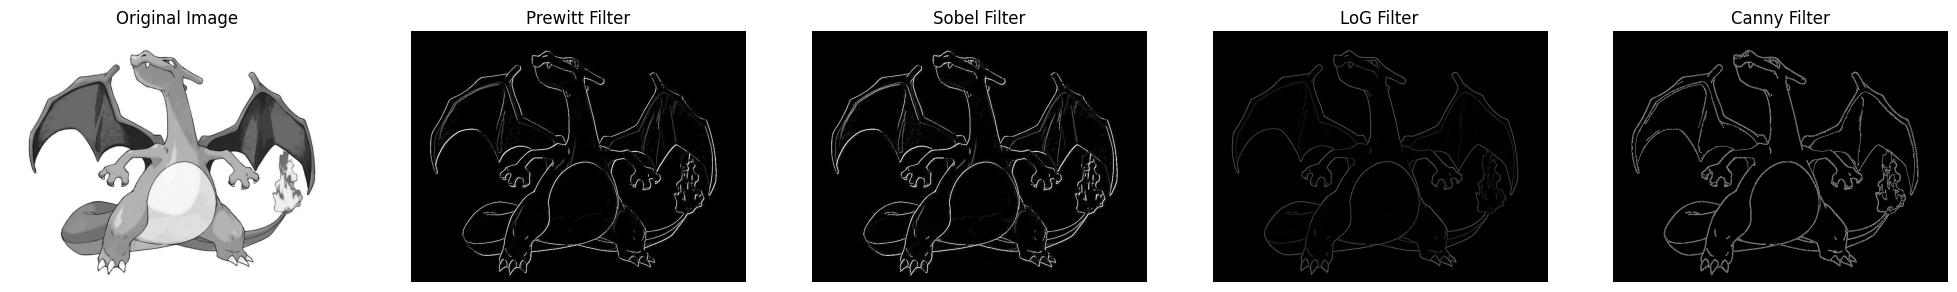

In [32]:
plt.figure(figsize=(25, 25))

plt.subplot(1, 5, 1)
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.title("Original Image")

plt.subplot(1, 5, 2)
plt.imshow(prewitt_filter_image, cmap="gray")
plt.axis("off")
plt.title("Prewitt Filter")

plt.subplot(1, 5, 3)
plt.imshow(sobel_filter_image, cmap="gray")
plt.axis("off")
plt.title("Sobel Filter")

plt.subplot(1, 5, 4)
plt.imshow(LoG_image1, cmap="gray")
plt.axis("off")
plt.title("LoG Filter")

plt.subplot(1, 5, 5)
plt.imshow(canny_image, cmap="gray")
plt.axis("off")
plt.title("Canny Filter")

plt.show()